In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from matplotlib import style
import warnings
from random import sample

from PIL import Image, ImageFont, ImageDraw 
from skimage import io

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.preprocessing.image import DirectoryIterator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import os
from os import path
import cv2
import shutil 
import datetime

In [2]:
target_names = ['COVID-19', 'pneumonia', 'normal']
BATCH_SIZE = 32
IMG_SIZE = (224, 224, )

frente_dir = './frente'
costado_dir = './costado'

In [5]:
def iterate_dir(directory):
    dir_content = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            dir_content.append(filename)
        else:
            continue
            
    df = pd.DataFrame({
        "filepath": dir_content,
        "directory": directory,
        "prediction": "",
        "label": ""
    })
    return df

df_side_images = iterate_dir(costado_dir)
df_front_images = iterate_dir(frente_dir)

In [6]:
df_side_images

,filepath,directory,prediction,label
0,18efe215-a4ef-4dbd-9cca-9aa5406fa9dc.jpg,./costado,,
1,37290961-e26d-4d77-b84f-310463a59bd7.jpg,./costado,,
2,33ba3c69-465b-4e73-85b8-c88f7e69643f.jpg,./costado,,
3,e05d8aad-ce43-4d4a-a8d3-f81458d65e62.jpg,./costado,,
4,66099a9f-3391-4286-a1d0-1f2593d434ba.jpg,./costado,,
5,51dcf669-9704-4e8b-81ef-cdb149a31b06.jpg,./costado,,


In [7]:
df_front_images

,filepath,directory,prediction,label
0,Frente_8517272f-73e6-4b2e-99d3-fb37bfb6b734.jpg,./frente,,
1,Frente_20890706-7022-4847-aaa1-c8c53f447725.jpg,./frente,,
2,Frente_6e3352f0-1b40-4384-8a2e-41cdda76235d.jpg,./frente,,
3,Frente_4ac5ae90-4f92-4728-b5bf-06ea188f1f23.jpg,./frente,,
4,Frente_1ba5df19-9985-4ac4-82b5-ae926ed7741e.jpg,./frente,,
5,Frente_75230546-8a09-48b9-8279-8ce591383259.jpg,./frente,,


In [22]:
df = pd.concat([df_front_images, df_side_images], ignore_index=True)
df

,filepath,directory,prediction,label
0,Frente_8517272f-73e6-4b2e-99d3-fb37bfb6b734.jpg,./frente,,
1,Frente_20890706-7022-4847-aaa1-c8c53f447725.jpg,./frente,,
2,Frente_6e3352f0-1b40-4384-8a2e-41cdda76235d.jpg,./frente,,
3,Frente_4ac5ae90-4f92-4728-b5bf-06ea188f1f23.jpg,./frente,,
4,Frente_1ba5df19-9985-4ac4-82b5-ae926ed7741e.jpg,./frente,,
5,Frente_75230546-8a09-48b9-8279-8ce591383259.jpg,./frente,,
6,18efe215-a4ef-4dbd-9cca-9aa5406fa9dc.jpg,./costado,,
7,37290961-e26d-4d77-b84f-310463a59bd7.jpg,./costado,,
8,33ba3c69-465b-4e73-85b8-c88f7e69643f.jpg,./costado,,
9,e05d8aad-ce43-4d4a-a8d3-f81458d65e62.jpg,./costado,,


In [55]:
df_7['label'] = df_7["prediction"].apply(type_encoder)
df_7['label']

0     Covid-19
1     Covid-19
2     Covid-19
3     Covid-19
4     Covid-19
5     Covid-19
6       Normal
7     Covid-19
8       Normal
9       Normal
10    Covid-19
11    Covid-19
Name: label, dtype: object

In [56]:
def type_encoder(x):
    if x == 2:
        return 'Normal'
    elif x == 1:
        return 'Pneumonia'
    else:
        return 'Covid-19'
    
def predict_images(data, model):
    labels = ['COVID-19', 'pneumonia', 'normal']
    for index, row in data.iterrows():
        path = os.path.join(data['directory'].values[index], data['filepath'].values[index])
        image = cv2.imread(path)
        image = cv2.resize(image,(224,224))
        image = image.reshape(1,224,224,3)
        prediction = model.predict(image)
        prediction_cat =  prediction.argmax(axis=1)
        data["prediction"][index] = prediction.argmax(axis=1)
    data['label'] = data["prediction"].apply(type_encoder)

In [124]:
from keras.models import load_model
import cv2
import numpy as np

new_model7 = load_model('model.h7')

from keras.optimizers import SGD
learning_rate = 0.001 
decay_rate = 1e-3
momentum = 0.5

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

new_model7.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
df_7 = df
predict_images(df_7, new_model7)
df_7

,filepath,directory,prediction,label
0,Frente_8517272f-73e6-4b2e-99d3-fb37bfb6b734.jpg,./frente,[0],Covid-19
1,Frente_20890706-7022-4847-aaa1-c8c53f447725.jpg,./frente,[0],Covid-19
2,Frente_6e3352f0-1b40-4384-8a2e-41cdda76235d.jpg,./frente,[0],Covid-19
3,Frente_4ac5ae90-4f92-4728-b5bf-06ea188f1f23.jpg,./frente,[0],Covid-19
4,Frente_1ba5df19-9985-4ac4-82b5-ae926ed7741e.jpg,./frente,[0],Covid-19
5,Frente_75230546-8a09-48b9-8279-8ce591383259.jpg,./frente,[0],Covid-19
6,18efe215-a4ef-4dbd-9cca-9aa5406fa9dc.jpg,./costado,[2],Normal
7,37290961-e26d-4d77-b84f-310463a59bd7.jpg,./costado,[0],Covid-19
8,33ba3c69-465b-4e73-85b8-c88f7e69643f.jpg,./costado,[2],Normal
9,e05d8aad-ce43-4d4a-a8d3-f81458d65e62.jpg,./costado,[2],Normal


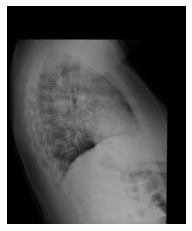

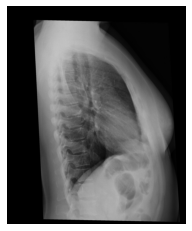

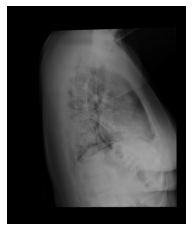

In [136]:
def plot_images(df):
    for index, row in new_df.iterrows():
        path = os.path.join(new_df['directory'].values[index], new_df['filepath'].values[index])
        image = cv2.imread(path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()  
normal_df = df_7[df_7['label'] == 'Normal']
side_normal_images = normal_df.reset_index(drop=True, inplace=True)
plot_images(side_normal_images)

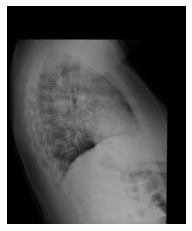

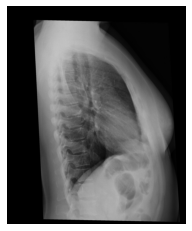

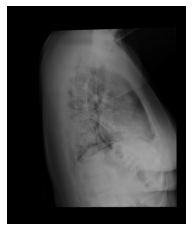

In [138]:
covid_df = df_7[df_7['label'] == 'COVID-19']
side_covid_images = covid_df.reset_index(drop=True, inplace=True)
plot_images(side_covid_images)

In [58]:
new_model9 = load_model('model.h9')
new_model9.compile(optimizer=sgd, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
df_9 = df
predict_images(df_9, new_model9)
df_9

,filepath,directory,prediction,label
0,Frente_8517272f-73e6-4b2e-99d3-fb37bfb6b734.jpg,./frente,[0],Covid-19
1,Frente_20890706-7022-4847-aaa1-c8c53f447725.jpg,./frente,[0],Covid-19
2,Frente_6e3352f0-1b40-4384-8a2e-41cdda76235d.jpg,./frente,[0],Covid-19
3,Frente_4ac5ae90-4f92-4728-b5bf-06ea188f1f23.jpg,./frente,[0],Covid-19
4,Frente_1ba5df19-9985-4ac4-82b5-ae926ed7741e.jpg,./frente,[0],Covid-19
5,Frente_75230546-8a09-48b9-8279-8ce591383259.jpg,./frente,[0],Covid-19
6,18efe215-a4ef-4dbd-9cca-9aa5406fa9dc.jpg,./costado,[0],Covid-19
7,37290961-e26d-4d77-b84f-310463a59bd7.jpg,./costado,[0],Covid-19
8,33ba3c69-465b-4e73-85b8-c88f7e69643f.jpg,./costado,[0],Covid-19
9,e05d8aad-ce43-4d4a-a8d3-f81458d65e62.jpg,./costado,[0],Covid-19


In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
style.use("ggplot")
pathImage = "./data2" # data contiene todas las fotos. Esta en la misma carpeta de este proyecto

SEED = 42
np.random.seed(seed=SEED)

In [26]:
def test_model(model, test_dir):
    target_names = ['COVID-19', 'pneumonia', 'normal']
    y_test_pred = model.predict(test_dir, verbose=1)
    y_test_pred_cat = np.argmax(y_test_pred, axis=1)
    p = y_test_pred_cat
    y = target_names
    correct = np.nonzero(p == y)[0]
    incorrect = np.nonzero(p != y)[0]
    print("\n\n")
    print("Report")
    print("Correct predicted classes:", correct.shape[0])
    print("Incorrect predicted classes:", incorrect.shape[0])
    
    print("\n\n")
    print(classification_report(target_names, y_test_pred_cat, target_names=target_names))
    matrix = confusion_matrix(y, y_test_pred_cat)
    matrix = pd.DataFrame(matrix, columns=target_names, index=target_names)
    
    print("\n\n")
    print("Matriz de confusion:")
    print(matrix)
    
    FP = matrix.sum(axis=0) - np.diag(matrix)  
    FN = matrix.sum(axis=1) - np.diag(matrix)
    TP = np.diag(matrix)
    TN = matrix.values.sum() - (FP + FN + TP)

    TPR = TP/(TP+FN)
    print("\n\n")
    print("Sensitivity:")
    print(TPR)
    
    TNR = TN/(TN+FP) 
    print("\n\n")
    print("Specificity:")
    print(TNR)
    
    PPV = TP/(TP+FP)
    print("\n\n")
    print("Positive predictive value:")
    print(TNR)
    
    NPV = TN/(TN+FN)
    print("\n\n")
    print("Negative predictive value:")
    print(NPV)
    
    FPR = FP/(FP+TN)
    print("\n\n")
    print("False positive rate:")
    print(FPR)
    
    
    FNR = FN/(TP+FN)
    print("\n\n")
    print("False negative rate:")
    print(FNR)
    
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("\n\n")
    print("Overall accuracy:")
    print(ACC)
    
    print("\n\n")
    print("ROC AUC SCORE:")
    print(roc_auc_score(target_names, y_test_pred, multi_class='ovr'))
    print(FPR)
    
    
    FNR = FN/(TP+FN)
    print("\n\n")
    print("False negative rate:")
    print(FNR)
    
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("\n\n")
    print("Overall accuracy:")
    print(ACC)
    
    print("\n\n")
    print("ROC AUC SCORE:")
    print(roc_auc_score(target_names, y_test_pred, multi_class='ovr'))

In [ ]:
test_model(new_model9, )

In [3]:
df = pd.read_csv("./data_annotations.csv")
df

,patientid,filename,label,dataset
0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,cohen
1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,cohen
2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,cohen
3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,cohen
4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,cohen
...,...,...,...,...
15270,2c917d3a-95cb-4c11-802c-f83e28cb37bc,2c917d3a-95cb-4c11-802c-f83e28cb37bc.png,pneumonia,rsna
15271,3040d9d7-d895-453f-887c-616c10531960,3040d9d7-d895-453f-887c-616c10531960.png,pneumonia,rsna
15272,c07f52df-d481-434f-84c1-04263926ac40,c07f52df-d481-434f-84c1-04263926ac40.png,pneumonia,rsna
15273,c109061a-d815-4cae-8343-9230d8024adf,c109061a-d815-4cae-8343-9230d8024adf.png,pneumonia,rsna


### Dataset description

In [4]:
samples, features = df.shape
duplicated = df.duplicated().sum()
null_values = df.isnull().sum().sum()

print('Number of samples: %d'%(samples))
print('Number of duplicated values: %d'%(duplicated))
print('Number of Null samples: %d' % (null_values))

Number of samples: 15275
Number of duplicated values: 0
Number of Null samples: 0


### Image class distribution

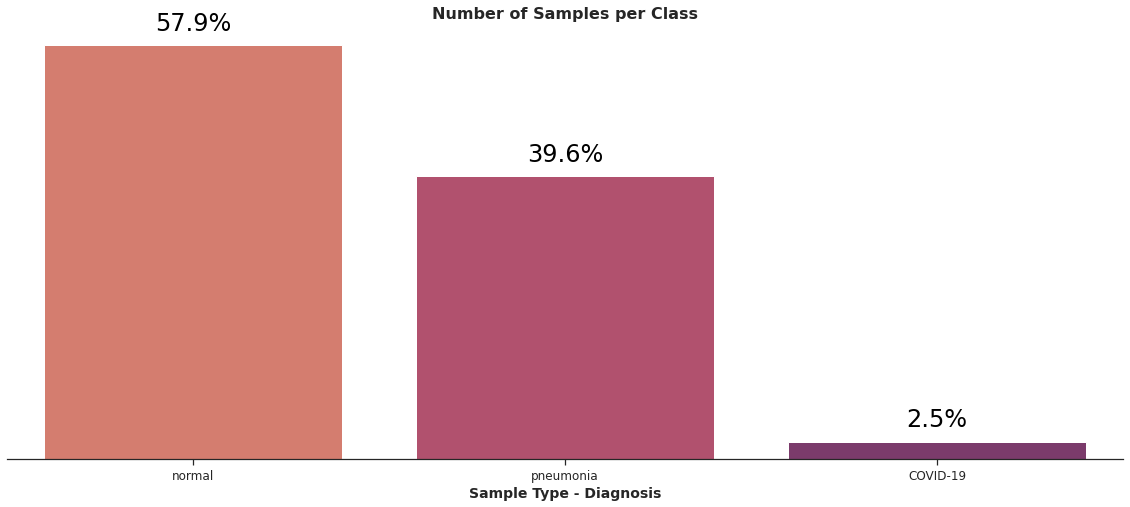

In [5]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 2)
ax = sns.countplot(data = df, x='label', order = df['label'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Sample Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Samples per Class', fontsize = 16,weight = 'bold');

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')

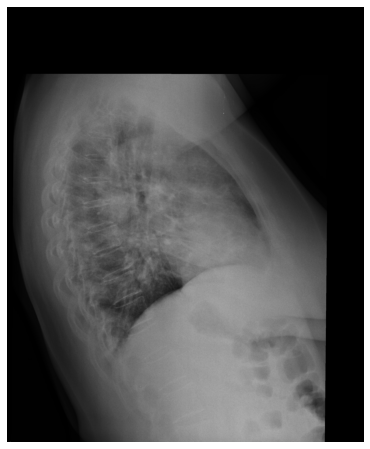

In [64]:
plt.figure(figsize=(20,8))
image = cv2.imread('./Costado_jpg_imgs/18efe215-a4ef-4dbd-9cca-9aa5406fa9dc.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()  

In [7]:
PATH='output_3'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')


In [8]:
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Image Data Type {}'.format(image.dtype))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Shape of the image : (1165, 1165, 3)
Image Hight 1165
Image Width 1165
Dimension of Image 3
Image size 4071675
Image Data Type uint8
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [53]:
train_generator =ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    color_mode="rgb",
    classes=['COVID-19', 'pneumonia', 'normal'],
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=val_dir,
    target_size=IMG_SIZE,
    color_mode="rgb",
    classes=['COVID-19', 'pneumonia', 'normal'],
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)


Found 10691 images belonging to 3 classes.
Found 3052 images belonging to 3 classes.


In [17]:
def test_model(model, test_dir):
    y_test_pred = model.predict(test_dir, verbose=1)
    y_test_pred_cat = np.argmax(y_test_pred, axis=1)
    p = y_test_pred_cat
    y = test_dir.labels
    correct = np.nonzero(p == y)[0]
    incorrect = np.nonzero(p != y)[0]
    print("\n\n")
    print("Report")
    print("Correct predicted classes:", correct.shape[0])
    print("Incorrect predicted classes:", incorrect.shape[0])
    
    print("\n\n")
    print(classification_report(test_dir.labels, y_test_pred_cat, target_names=target_names))
    matrix = confusion_matrix(y, y_test_pred_cat)
    matrix = pd.DataFrame(matrix, columns=target_names, index=target_names)
    
    print("\n\n")
    print("Matriz de confusion:")
    print(matrix)
    
    FP = matrix.sum(axis=0) - np.diag(matrix)  
    FN = matrix.sum(axis=1) - np.diag(matrix)
    TP = np.diag(matrix)
    TN = matrix.values.sum() - (FP + FN + TP)

    TPR = TP/(TP+FN)
    print("\n\n")
    print("Sensitivity:")
    print(TPR)
    
    TNR = TN/(TN+FP) 
    print("\n\n")
    print("Specificity:")
    print(TNR)
    
    PPV = TP/(TP+FP)
    print("\n\n")
    print("Positive predictive value:")
    print(TNR)
    
    NPV = TN/(TN+FN)
    print("\n\n")
    print("Negative predictive value:")
    print(NPV)
    
    FPR = FP/(FP+TN)
    print("\n\n")
    print("False positive rate:")
    print(FPR)
    
    
    FNR = FN/(TP+FN)
    print("\n\n")
    print("False negative rate:")
    print(FNR)
    
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("\n\n")
    print("Overall accuracy:")
    print(ACC)
    
    print("\n\n")
    print("ROC AUC SCORE:")
    print(roc_auc_score(y, y_test_pred, multi_class='ovr'))
    print(FPR)
    
    
    FNR = FN/(TP+FN)
    print("\n\n")
    print("False negative rate:")
    print(FNR)
    
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("\n\n")
    print("Overall accuracy:")
    print(ACC)
    
    print("\n\n")
    print("ROC AUC SCORE:")
    print(roc_auc_score(y, y_test_pred, multi_class='ovr'))

In [19]:
new_model9.predict(front_images, verbose=1)
## new_model9.predict(side_images, verbose=1)

IndexError: list index out of range

In [ ]:
test_model(new_model7, front_images)
test_model(new_model7, side_images)

## Modelo 10

In [11]:
def type_encoder(x):
    if x == 2:
        return 'Normal'
    elif x == 1:
        return 'Pneumonia'
    else:
        return 'COVID-19'

In [13]:
df_valid = pd.DataFrame(valid_generator.labels, columns=['Label'])
type_enc = df_valid['Label'].apply(type_encoder)
df_valid['Enc'] = type_enc

samples, features = df_valid.shape

plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 2)
ax = sns.countplot(data =df_valid, x='Enc', order = df_valid['Enc'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Sample Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Samples per Class', fontsize = 16,weight = 'bold');

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')


NameError: name 'valid_generator' is not defined

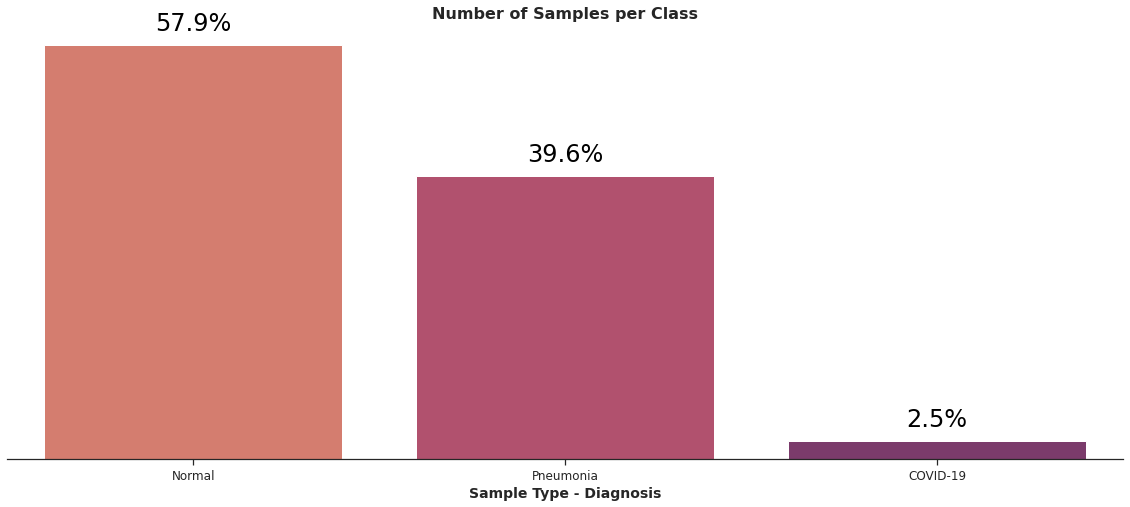

In [14]:
df_test = pd.DataFrame(test_dataset.labels, columns=['Label'])
type_enc = df_test['Label'].apply(type_encoder)
df_test['Enc'] = type_enc

samples, features = df_test.shape

plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 2)
ax = sns.countplot(data = df_test, x='Enc', order = df_test['Enc'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Sample Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Samples per Class', fontsize = 16,weight = 'bold');

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')

In [13]:
new_model10 = tf.keras.models.load_model('model.h10')
test_model(new_model10)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [12]:
df_train= pd.DataFrame(train_generator.labels, columns=['Label'])
type_enc = df_train['Label'].apply(type_encoder)
df_train['Enc'] = type_enc

samples, features = df_train.shape

plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 2)
ax = sns.countplot(data = df_train, x='Enc', order = df_train['Enc'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Sample Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Samples per Class', fontsize = 16,weight = 'bold');

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')


NameError: name 'train_generator' is not defined

## Modelo 9

In [13]:
new_model9 = tf.keras.models.load_model('model.h9')
##test_model(new_model9)

## Modelo 8

In [19]:
new_model8 = tf.keras.models.load_model('model.h8')
test_model(new_model8)

144/144 [==============================] - 115s 792ms/step



Report
Correct predicted classes: 3977
Incorrect predicted classes: 608



              precision    recall  f1-score   support

    COVID-19       0.55      0.05      0.10       115
   pneumonia       0.85      0.83      0.84      1814
      normal       0.88      0.93      0.90      2656

    accuracy                           0.87      4585
   macro avg       0.76      0.60      0.61      4585
weighted avg       0.86      0.87      0.86      4585




Matriz de confusion:
           COVID-19  pneumonia  normal
COVID-19          6         73      36
pneumonia         3       1501     310
normal            2        184    2470



Sensitivity:
COVID-19     0.052174
pneumonia    0.827453
normal       0.929970
dtype: float64



Specificity:
COVID-19     0.998881
pneumonia    0.907254
normal       0.820632
dtype: float64



Positive predictive value:
COVID-19     0.998881
pneumonia    0.907254
normal       0.820632
dtype: float

## Modelo 7

In [14]:
new_model7 = tf.keras.models.load_model('model.h7')
##test_model(new_model7)

In [11]:
from keras.models import model_from_json
import numpy as np

target_names = ['COVID-19', 'pneumonia', 'normal']
diagnosis = []

def predict_diagnosis(directory, model):
    
    
    y_test_pred = model.predict(test_dataset)
    y_test_pred_cat = np.argmax(y_test_pred, axis=1)
    diagnosis.append(y_test_pred_cat)
    
    return y_test_pred_cat

In [ ]:
def plot_predicted_images(predictions, data_index, x_data, y_data, size=16, cmap="gray"):
    # Plot the sample images now
    f, ax = plt.subplots(4, 4, figsize=(15, 15))

    for i, indx in enumerate(np.random.choice(data_index, size=size, replace=False)):
        ax[i//4, i%4].imshow(x_data[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(LABELS[y_data[indx]], LABELS[predicted_classes[indx]]))
    plt.show()    
    
plot_predicted_images(predicted_classes, correct, x_test_data, y_test_data, cmap="Greens")

In [ ]:
y_pred_cat = predict_diagnosis(frente_dir, model9)